<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Import dataset
data=pd.read_csv("realest.csv")

In [3]:
# Preprocess the data
# 1. Handle any missing values by dropping them (or alternatively, you could impute)
data = data.dropna()

In [4]:
# 2. Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

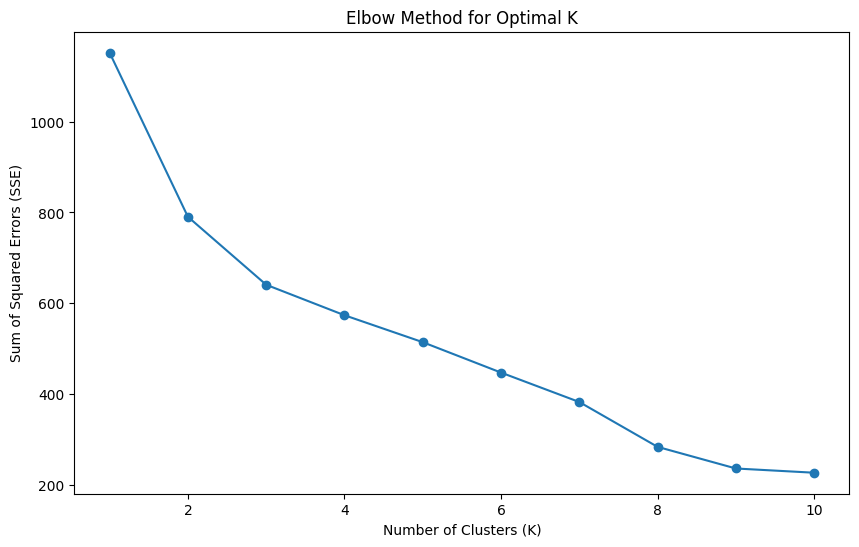

In [6]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [7]:

# Choose the optimal number of clusters (e.g., where the elbow is)
optimal_k = 3  # Example choice; adjust based on elbow plot

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

In [8]:
# Display the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[6.24166667e+01 2.91666667e+00 1.17318750e+03 6.35416667e+00
  3.47916667e+01 1.20212500e+03 1.41666667e+00 1.33333333e+00
  1.04166667e-01]
 [4.77500000e+01 2.92647059e+00 8.70205882e+02 5.95588235e+00
  2.89852941e+01 6.92764706e+02 1.31617647e+00 3.23529412e-01
  2.64705882e-01]
 [8.47500000e+01 5.83333333e+00 2.20950000e+03 1.05000000e+01
  4.50000000e+01 1.13758333e+03 2.75000000e+00 1.50000000e+00
  5.00000000e-01]]


In [9]:
# Display a sample of the data with assigned clusters
print("Data with Cluster Labels:")
print(data.head())

Data with Cluster Labels:
   Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition  \
0   53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0   
1   55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0   
2   56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0   
3   58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0   
4   64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0   

   Cluster  
0        1  
1        0  
2        0  
3        0  
4        0  
